In [ ]:
import pandas as pd
import numpy as np
import json
import sys
from apyori import apriori
import networkx as nx 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Data preprocessing

In [ ]:
df=pd.read_csv('data/data.csv')
df.sample(5)

,DATENEW,RECEIPT,NAME,UNITS
265980,2017-07-11,e1888fb2-6d39-4cbe-a105-4c7e951f5a32,Lettuce Iceberg,1.000
597159,2019-05-21,3896ba43-3246-4386-9765-45330307a5ad,Ginger,0.034
308088,2017-10-04,e20a72ed-db1c-46a5-9966-8fd4d4f8bcb4,Gold Honeydew,2.000
131067,2016-11-20,735d7f5a-11b9-4639-b39e-f6b096a5f071,Capsicum red,0.192
349899,2017-12-22,633deefe-8bc5-4285-9a9d-9eb01e5c1f84,Leek,1.000


In [ ]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)
df.describe(include='all')

(659221, 4)
(655837, 4)


,DATENEW,RECEIPT,NAME,UNITS
count,655837,655837,655837,655837.000000
unique,1280,181970,1265,NaN
top,2016-12-24,e6b225f3-96d3-4940-9065-90bd5b86f636,Banana Cavendish,NaN
freq,987,36,43688,NaN
mean,NaN,NaN,NaN,0.903796
std,NaN,NaN,NaN,0.756547
min,NaN,NaN,NaN,-1.000000
25%,NaN,NaN,NaN,0.452000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,1.000000


In [ ]:
groups=df.groupby('RECEIPT')
baskets=[]
for name, group in groups:
    baskets.append(group['NAME'].tolist())

In [ ]:
print(len(baskets))
print(baskets[0:5])

181970
[['Avocado Hass Medium', 'Lemon Puff 2 for 2.50', 'Zucchini green', 'Soya Meet Prawn 90g', 'Derana Jack Mackerel 425g', 'Papadam 200g derana'], ['Lettuce Iceberg', 'Broccoli', 'Cucumber Lebanese'], ['Banana Cavendish', 'Brushed Potatoes 5kg bag'], ['Avocado Hass Medium', 'Pear Packham', 'Lemon', 'Carrots ', 'Cucumber Lebanese', 'Apples Pink Lady', 'Field Tomatoes'], ['Watermelon seeded', 'Mandarin Imperial']]


# Association rules base on apriori algorithm

In [ ]:
ass_rules = apriori(baskets, min_support=0.002, min_confidence=0.3, min_lift=1.5, min_length=2)
ass_results = list(ass_rules)
print(len(ass_results))

143


In [ ]:
ass_results=sorted(list(ass_results), key=lambda x: x[1], reverse=True)

In [ ]:
ass_results[0][2][0]

OrderedStatistic(items_base=frozenset({'Mandarin Imperial'}), items_add=frozenset({'Banana Cavendish'}), confidence=0.4013472615444694, lift=1.6895264807469197)

In [ ]:
one2one_rules=[]
supports=[]
confidences=[]
lifts=[]
for i,item in enumerate(ass_results):
    print(f"\n---------{i+1}----------")
    antecedent = list(item[2][0][0])
    consequent = list(item[2][0][1])
    print("Rule: " + str(antecedent) + " -> " + str(consequent))

    print("    - Support: " + str(item[1]))
    print("    - Confidence: " + str(item[2][0][2]))
    print("    - Lift: " + str(item[2][0][3]))
    
    if len(antecedent)==1 and len(consequent)==1:
        one2one_rules.append((antecedent[0], consequent[0]))
        supports.append(item[1])
        confidences.append(item[2][0][2])
        lifts.append(item[2][0][3])
    


---------1----------
Rule: ['Mandarin Imperial'] -> ['Banana Cavendish']
    - Support: 0.0225916359839534
    - Confidence: 0.4013472615444694
    - Lift: 1.6895264807469197

---------2----------
Rule: ['Apples Pink Lady'] -> ['Banana Cavendish']
    - Support: 0.01992086607682585
    - Confidence: 0.44719960523069335
    - Lift: 1.8825482259659303

---------3----------
Rule: ['Pear Packham'] -> ['Banana Cavendish']
    - Support: 0.018926196625817442
    - Confidence: 0.46030473135525257
    - Lift: 1.9377160562776807

---------4----------
Rule: ['Apples Royal Gala'] -> ['Banana Cavendish']
    - Support: 0.012513051601912403
    - Confidence: 0.4247341913822048
    - Lift: 1.7879769774867516

---------5----------
Rule: ['Orange navel'] -> ['Banana Cavendish']
    - Support: 0.012375666318623949
    - Confidence: 0.3597444089456869
    - Lift: 1.5143935525446282

---------6----------
Rule: ['Nectarine White'] -> ['Banana Cavendish']
    - Support: 0.011260097818321702
    - Confiden

In [ ]:
print(one2one_rules)
print(supports)

[('Mandarin Imperial', 'Banana Cavendish'), ('Apples Pink Lady', 'Banana Cavendish'), ('Pear Packham', 'Banana Cavendish'), ('Apples Royal Gala', 'Banana Cavendish'), ('Orange navel', 'Banana Cavendish'), ('Nectarine White', 'Banana Cavendish'), ('Berries Strawberry (medium)', 'Banana Cavendish'), ('Capsicum green', 'Capsicum red'), ('Apples Granny Smith', 'Banana Cavendish'), ('Nectarine Yellow', 'Banana Cavendish'), ('Kiwi fruit Green', 'Banana Cavendish'), ('Avocado Hass Medium', 'Banana Cavendish'), ('navel oranges 3kg', 'Banana Cavendish'), ('Tomatoes Cherry', 'Banana Cavendish'), ('Cauliflower half', 'Broccoli'), ('Berries Strawberry (large)', 'Banana Cavendish'), ('Brussels sprouts', 'Banana Cavendish'), ('Apples Red Delicious', 'Banana Cavendish'), ('Pears brown bosc', 'Banana Cavendish'), ('3kg Valencia Oranges', 'Banana Cavendish'), ('Orange valencia', 'Banana Cavendish'), ('Apples Golden Delicious', 'Banana Cavendish'), ('Pink lady kids pack 1kg', 'Banana Cavendish'), ('Kens

# Visualization

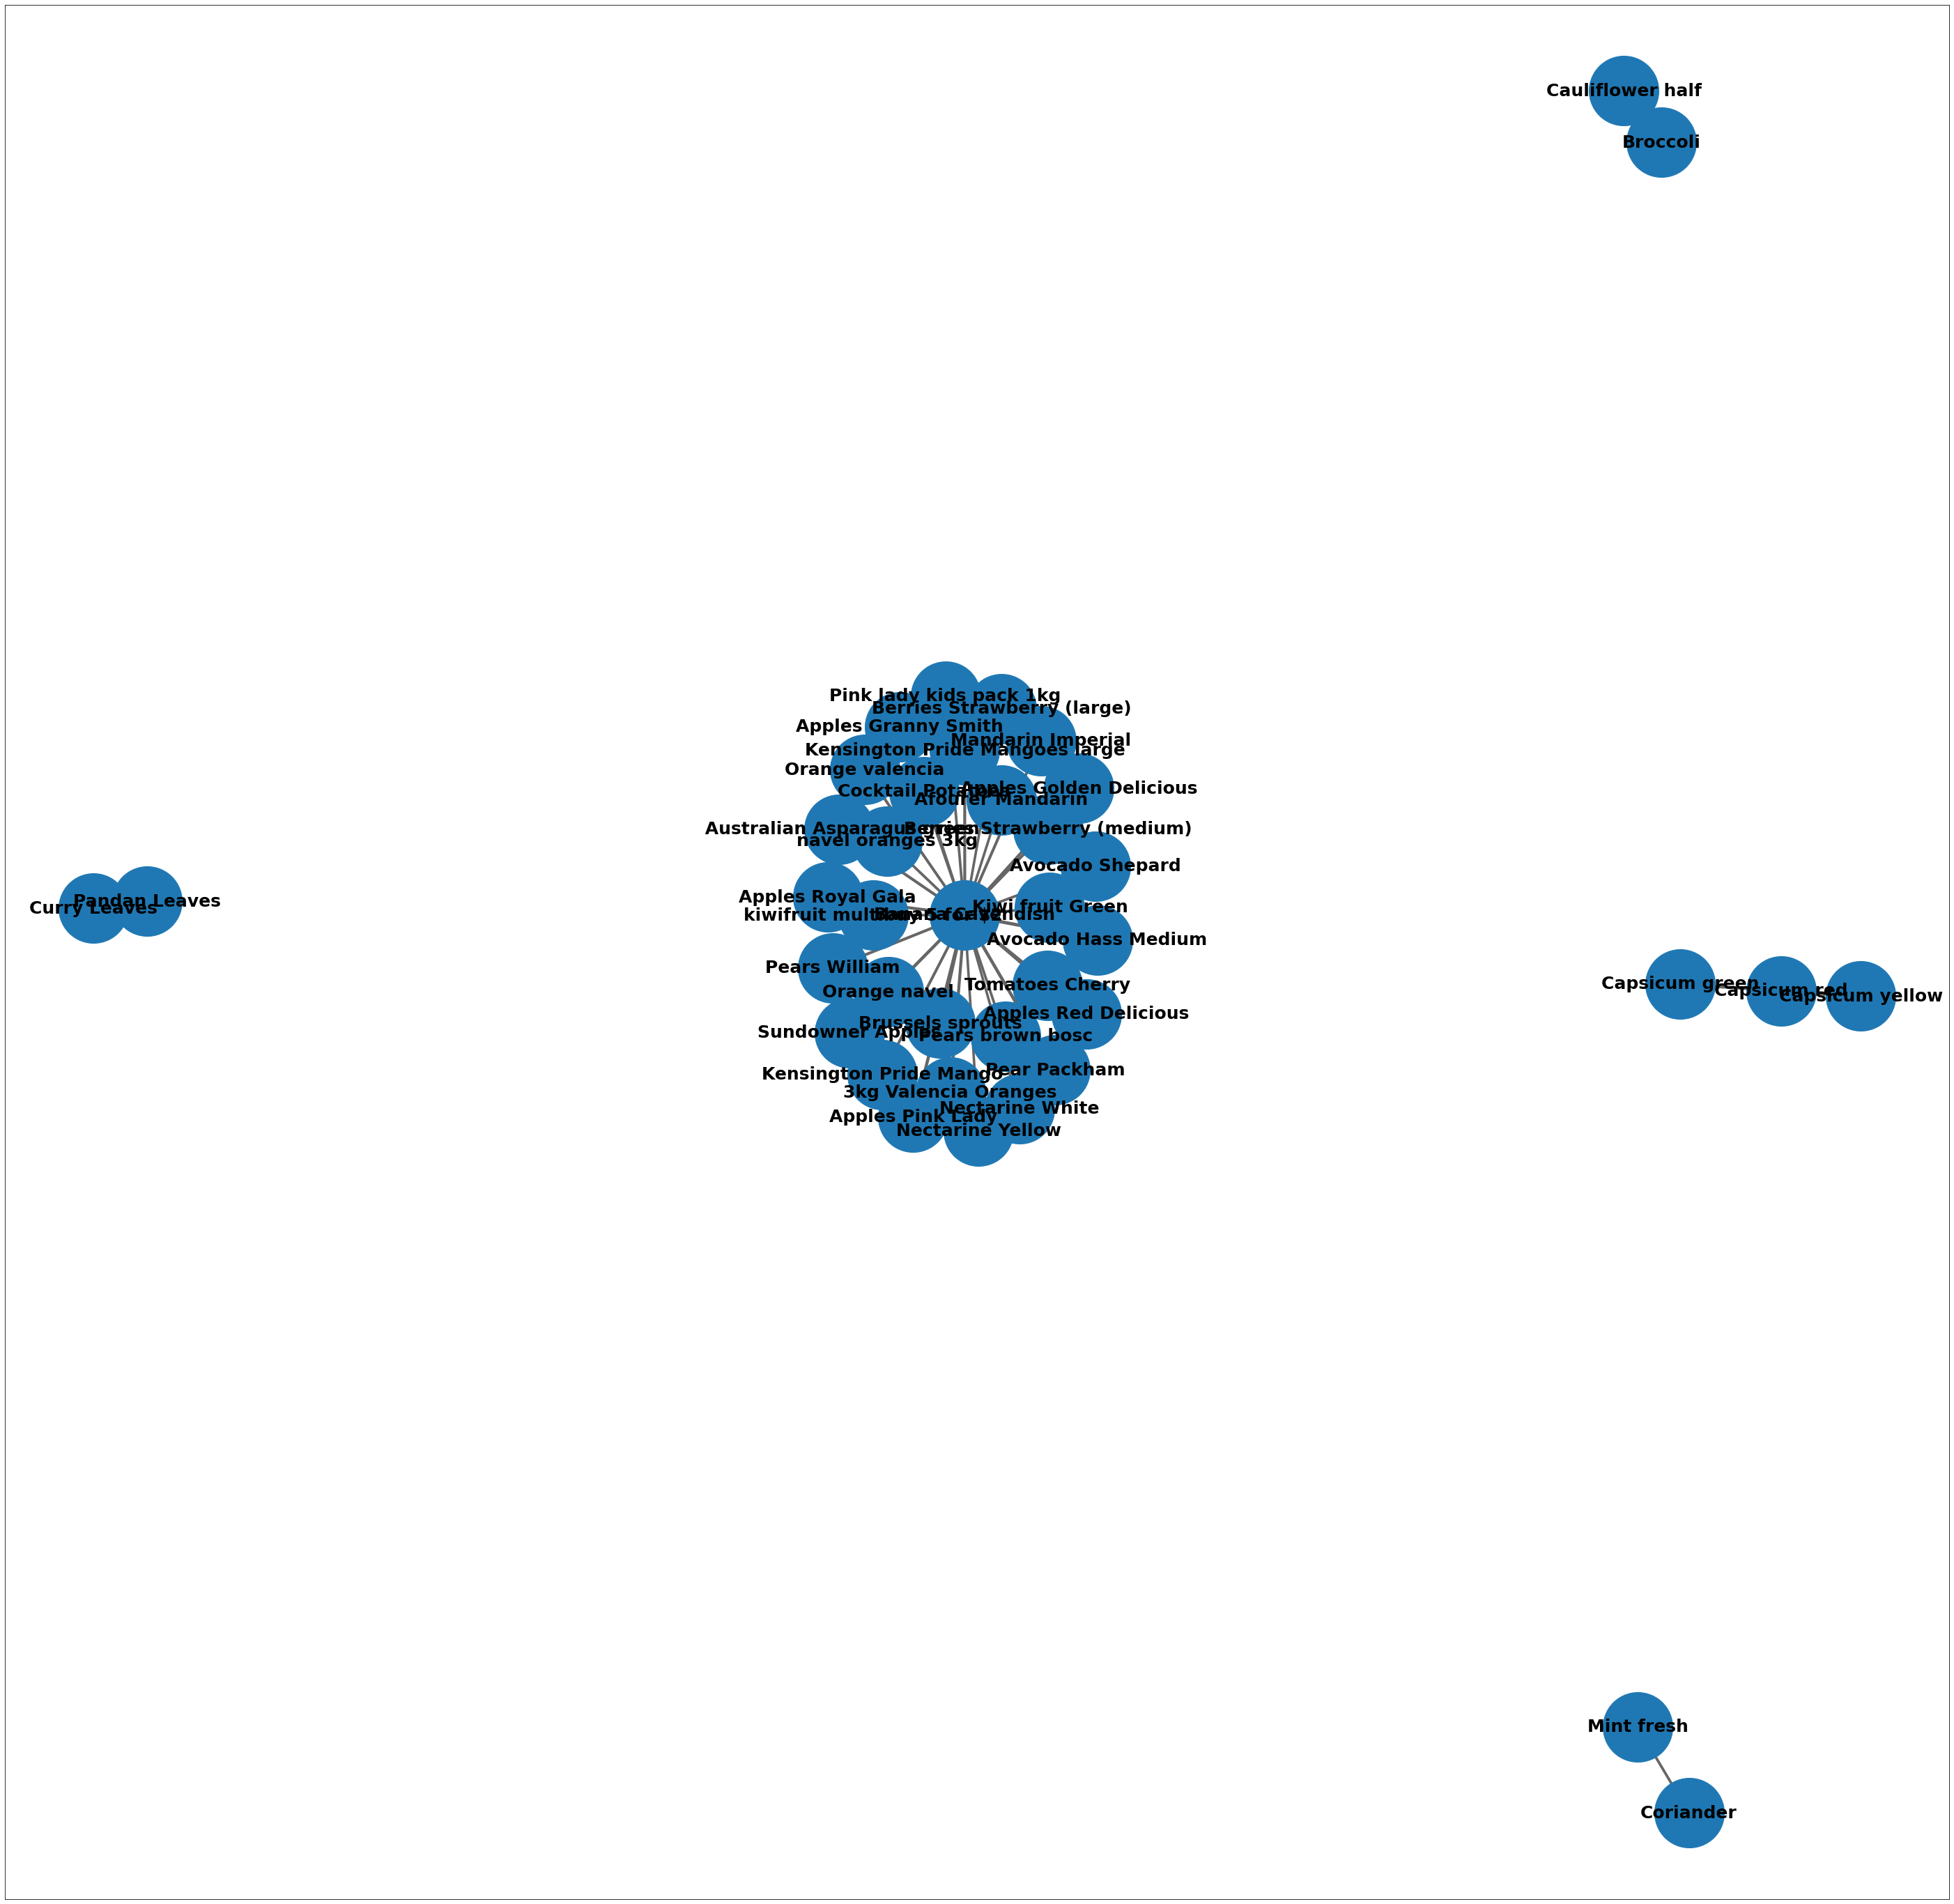

In [ ]:
lift_size= [int(i*1000) for i in lifts]
edge_width = [i * 10 for i in confidences] 
node_color=[i * 40 for i in supports]

scaler =MinMaxScaler(feature_range=(0, 13))
node_color=scaler.fit_transform((np.array(node_color)).reshape(-1,1))
node_color=(np.around(node_color.reshape(-1))).tolist()

G = nx.Graph()
plt.figure(2, figsize=(50, 50))
G.add_edges_from(one2one_rules) 
nx.draw_networkx(G, with_label = True, width=edge_width, node_size=10000,
                 edge_color ='.4', cmap=plt.cm.Blues, font_weight='bold', font_size=25) 
plt.show()  